In [14]:
import numpy as np
from matplotlib import pyplot as plt
import time
import tt

import functions as Boltzmann

class Params(object):
 
    def __init__(self):
        #fundamental constants
        self.Na = 6.02214129e+23
        self.kB = 1.381e-23 # J / K
        #gas parameters
        self.Mol = 40e-3 # kg / mol
        self.Rg = 8.3144598  / self.Mol  # J / (kg * K) 
        self.m = self.Mol / self.Na # kg
    
        self.Pr = 2. / 3.
        self.C = 144.4
        self.T_0 = 273.11
        self.mu_0 = 2.125e-05
    
        self.g = 5. / 3.
        
        self.d = 3418e-13

p = Params()

L = 30
N = 30
vmax = 2000.

n_l = 2e+23 
u_l = 387.
T_l = 300.

M = u_l / ((p.g * p.Rg * T_l) ** .5)

n_r = (p.g + 1.) * M * M / ((p.g - 1.) * M * M + 2.) * n_l
u_r = ((p.g - 1.) * M * M + 2.) / ((p.g + 1.) * M * M) * u_l
T_r = (2. * p.g * M * M - (p.g - 1.)) * ((p.g - 1.) * M * M + 2.) / ((p.g + 1) ** 2 * M * M) * T_l

l = 1. / ((2 ** .5) * np.pi * n_l * p.d * p.d)

x_l = -20*l
x_r = 20*l

h = (x_r - x_l) / L

x = np.linspace(x_l+h/2, x_r-h/2, L) / l

#x_l = -20*l
#x_r = 20*l

Tau = 1000

CFL = 0.5

print 'Max =', M

print 'n_l =', n_l, 'n_r =', n_r
print 'u_l =', u_l, 'u_r =', u_r
print 'T_l =', T_l, 'T_r =', T_r

hv = 2. * vmax / N
vx_ = np.linspace(-vmax+hv/2, vmax-hv/2, N)
vx, vy, vz = np.meshgrid(vx_, vx_, vx_, indexing='ij')

M_l = Boltzmann.F_m(vx-u_l, vy, vz, T_l, n_l, p)
M_r = Boltzmann.F_m(vx-u_r, vy, vz, T_r, n_r, p)


print 'Dens'
print (Boltzmann.J(M_l, vx, vy, vz, hv, N, p)[1] - n_l) / n_l
print (Boltzmann.J(M_r, vx, vy, vz, hv, N, p)[1] - n_r) / n_r

print 'Vel'
print (Boltzmann.J(M_l, vx, vy, vz, hv, N, p)[2] - u_l) / u_l
print (Boltzmann.J(M_r, vx, vy, vz, hv, N, p)[2] - u_r) / u_r

print 'Temp'
print (Boltzmann.J(M_l, vx, vy, vz, hv, N, p)[3] - T_l) / u_l
print (Boltzmann.J(M_r, vx, vy, vz, hv, N, p)[3] - T_r) / u_r

Max = 1.20043580246
n_l = 2e+23 n_r = 2.59586787121e+23
u_l = 387.0 u_r = 298.166177326
T_l = 300.0 T_r = 358.563930466
Dens
-3.269409636352e-11
-1.565757150004165e-10
Vel
-1.4216906262636282e-10
-9.296743384908322e-10
Temp
-3.7530889335181384e-10
-2.588626090680117e-09


In [15]:
S = Boltzmann.solver(x_l = x_l, x_r = x_r, L = L, Tau = Tau, CFL = CFL, vmax = vmax,
           N = N, n_l = n_l, u_l = u_l, T_l = T_l, p = p, filename = 'file.txt')

time = 0 h 7 m 1 s


delta = 0.023373536791125152


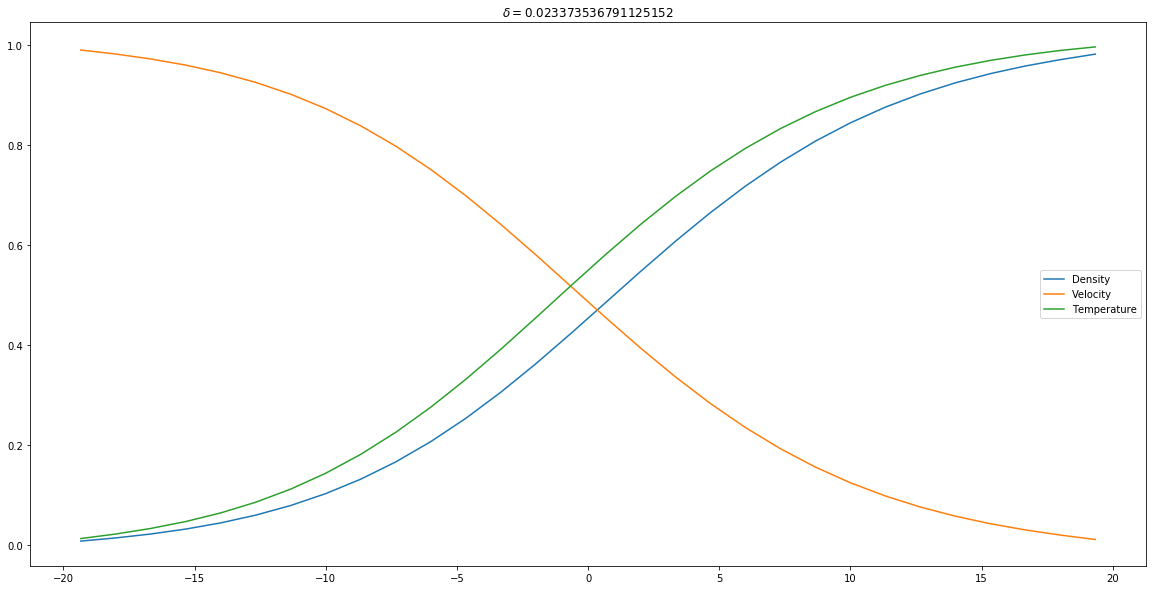

In [16]:
print 'delta =', S.delta
fig, ax = plt.subplots(figsize = (20,10))
line, = ax.plot(x, (S.Dens - n_l) / (n_r - n_l))
line.set_label('Density')
line, = ax.plot(x, (S.Vel - u_r) / (u_l - u_r))
line.set_label('Velocity')
line, = ax.plot(x, (S.Temp - T_l) / (T_r - T_l))
line.set_label('Temperature')
ax.legend()
ax.set(title='$\delta =$' + str(S.delta))
plt.show()

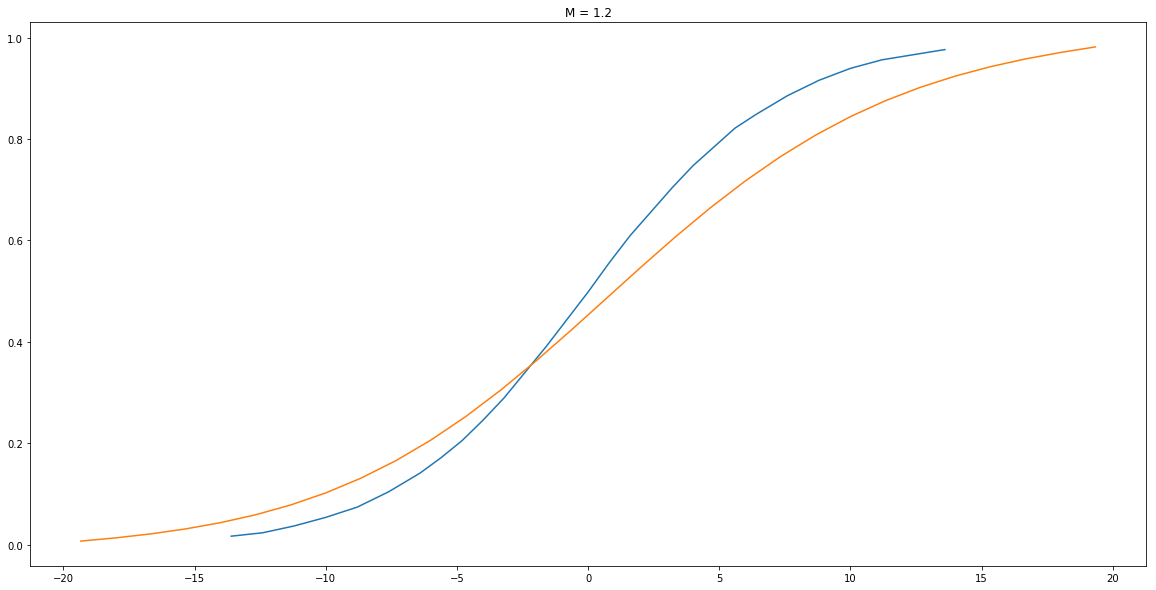

In [19]:
xx = np.array([-20.0,
-18.4,
-16.8,
-15.2,
-13.6,
-12.4,
-11.2,
-10.0,
-8.8,
-7.6,
-6.4,
-5.6,
-4.8,
-4.0,
-3.2,
-2.4,
-1.6,
-0.8,
0.0,
0.8,
1.6,
2.4,
3.2,
4.0,
4.8,
5.6,
6.4,
7.6,
8.8,
10.0,
11.2,
12.4,
13.6,
15.2,
16.8,
18.4,
20.0])

n = np.array([1.000,
1.000,
1.001,
1.003,
1.005,
1.007,
1.011,
1.016,
1.022,
1.031,
1.042,
1.051,
1.061,
1.073,
1.086,
1.101,
1.116,
1.132,
1.148,
1.165,
1.181,
1.195,
1.209,
1.222,
1.233,
1.244,
1.252,
1.263,
1.272,
1.279,
1.284,
1.287,
1.290,
1.293,
1.295,
1.296,
1.297])

T = np.array([1.000,
1.000,
1.001,
1.003,
1.005,
1.007,
1.011,
1.015,
1.021,
1.029,
1.039,
1.046,
1.055,
1.065,
1.075,
1.085,
1.096,
1.107,
1.118,
1.128,
1.137,
1.146,
1.153,
1.160,
1.166,
1.171,
1.175,
1.180,
1.184,
1.187,
1.189,
1.191,
1.192,
1.193,
1.194,
1.195,
1.195])

a = 4

fig, ax = plt.subplots(figsize = (20,10))
line, = ax.plot(xx[a:-a], ((n - n[0]) / (n[-1] - n[0]))[a:-a])
line.set_label('Density_t')
#line, = ax.plot(xx, (T - T[0]) / (T[-1] - T[0]))
#line.set_label('Temperature_t')
line, = ax.plot(x, (S.Dens - n_l) / (n_r - n_l))
line.set_label('Density')
#line, = ax.plot(x, (S.Temp - T_l) / (T_r - T_l))
#line.set_label('Temperature')
ax.set_title('M = 1.2')
plt.show()